# Predictive Modeling - pKa edition

Today, we delve into the application of regression analysis in chemistry and data science.
Our dataset comprises p$K_\text{a}$ values and corresponding molecular descriptors, offering a quantitative approach to understanding molecular properties.

## pKa

The p$K_\text{a}$ measures a substance's acidity or basicity, particularly in chemistry.
It is the negative logarithm (base 10) of the acid dissociation constant ($K_\text{a}$) of a solution.
The p$K_\text{a}$ value helps quantify the strength of an acid in a solution.

The expression for the acid dissociation constant ($K_\text{a}$), from which p$K_\text{a}$ is derived, is given by the following chemical equilibrium equation for a generic acid (HA) in water:

$$
\text{HA} \rightleftharpoons \text{H}^+ + \text{A}^-
$$

The equilibrium constant ($K_\text{a}$) for this reaction is defined as the ratio of the concentrations of the dissociated ions ($\text{H}^+$ and $\text{A}^-$) to the undissociated acid ($\text{HA}$):

$$
K_a = \frac{[\text{H}^+][\text{A}^-]}{[\text{HA}]}
$$

Taking the negative logarithm (base 10) of both sides of the equation gives the expression for pKa:

$$
\text{p}K_a = -\log_{10}(K_a)
$$

So, in summary, the p$K_\text{a}$ is calculated by taking the negative logarithm of the acid dissociation constant ($K_\text{a}$) for a given acid.
A lower p$K_\text{a}$ indicates a stronger acid.

In simpler terms:

-   A lower p$K_\text{a}$ indicates a stronger acid because it means the acid is more likely to donate a proton (H+) in a chemical reaction.
-   A higher p$K_\text{a}$ indicates a weaker acid as it is less likely to donate a proton.

The p$K_\text{a}$ is a crucial parameter in understanding the behavior of acids and bases in various chemical reactions.
It is commonly used in fields such as medicinal chemistry, biochemistry, and environmental science to describe and predict the behavior of molecules in solution.

## Exploring the dataset

Now, let's shift our focus to a practical application of our theoretical knowledge.

I found [this dataset](https://github.com/IUPAC/Dissociation-Constants) that contains a bunch of high-quality experimental measurements of pKas.
It contains a bunch of information and other aspects that makes regression a bit of a nightmare; thus, I did some cleaning of the data and computed some molecular features (i.e., descriptors) that we can use.
Before delving into regression analysis, it is essential to conduct a systematic review of the dataset.
This preliminary examination will provide us with the necessary foundation to understand the quantitative relationships between molecular features and acidity.
Let's now proceed with a methodical investigation of the empirical data, setting the stage for our subsequent analytical endeavors.

In [6]:
!pip install rdkit
!pip install py3Dmol

### Loading

Using the Pandas library, read the CSV file into a DataFrame.
Use the variable you defined in the previous step.

In [34]:
import numpy as np
import pandas as pd

# @title
# pandas - Python library to work with data we want to open in Excel

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import py3Dmol


def show_mol(smi, style="stick"):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=500, height=500)
    view.addModel(mblock, "mol")
    view.setStyle({style: {}})
    view.zoomTo()
    view.show()

In [39]:
CSV_PATH = "https://github.com/oasci-courses/pitt-biosc1540-2024f/raw/refs/heads/main/content/lectures/21/smiles-pka-desc.csv"

df = pd.read_csv(CSV_PATH)
print(df)

mol_example=df.iloc[600]  #prints values from a given index in the whole file
#print(mol_example)

#df.columns gives columns
#show_mol(mol_example) won't work, we need one SMIILES string and not the whole row



                      SMILES  pka_value  FractionCSP3  EState_VSA10  \
0     Brc1cc2cccnc2c2ncccc12   4.200000      0.000000           0.0   
1           Brc1ccc2ccccc2n1   1.050000      0.000000           0.0   
2           Brc1ccc2cccnc2c1   3.870000      0.000000           0.0   
3           Brc1ccc2ncccc2c1   3.910000      0.000000           0.0   
4           Brc1cccc2cccnc12   3.130000      0.000000           0.0   
...                      ...        ...           ...           ...   
1701   c1cncc(CNCc2cccnc2)c1   7.150000      0.166667           0.0   
1702                c1cnccn1   1.100000      0.000000           0.0   
1703                 c1cnoc1   1.300000      0.000000           0.0   
1704                 c1cscn1   2.529333      0.000000           0.0   
1705              c1nc[nH]n1   2.300000      0.000000           0.0   

      MinAbsPartialCharge  HallKierAlpha  MaxEStateIndex  SMR_VSA10  \
0                0.097537          -1.48        4.377685  37.735794   
1    

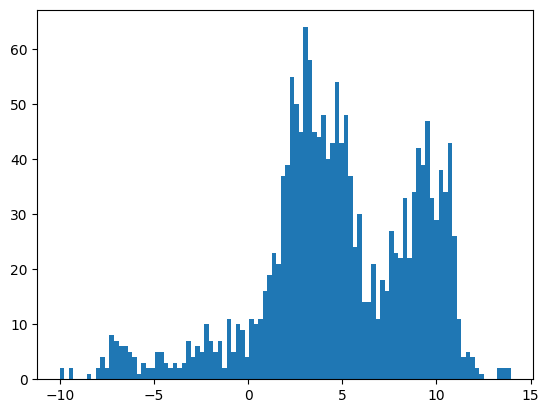

In [40]:
#IMPORTANT - plotting

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1, nrows=1)

ax.hist(df["pka_value"], bins=100)

plt.show()

Text(0, 0.5, 'pka_value')

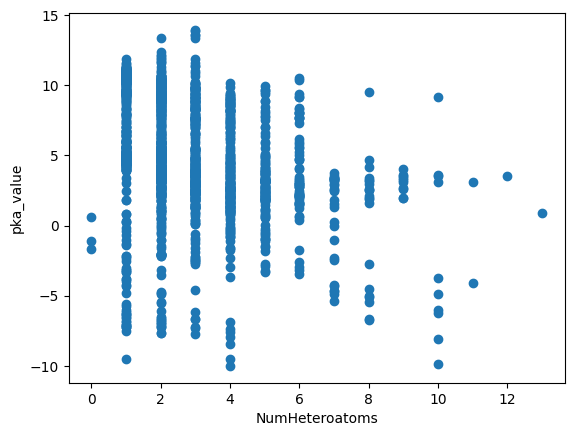

In [41]:
#IMPORTANT - plotting

fig, ax=plt.subplots()

ax.scatter(df["NumHeteroatoms"], df["pka_value"])
ax.set_xlabel("NumHeteroatoms")
ax.set_ylabel("pka_value")

#LINEAR REGRESSION - finding a line of best fit. pay attention.

In [42]:
#LINEAR REGRESSION - finding a line of best fit. pay attention.

#can find this formula online, get a simple equation from data and fit a line to it
#scikit learn has info on this

from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()
print(model)

LinearRegression()


In [68]:
x = df["SPS"].to_numpy().reshape(-1, 1)
print(x)
y=df["pka_value"].to_numpy().reshape(-1, 1)

#we need array-like data. numpy better than pandas, supported by scikit learn here


[[11.        ]
 [10.27272727]
 [10.27272727]
 ...
 [ 8.        ]
 [ 8.        ]
 [ 8.        ]]


In [64]:
s = df.drop(columns=["SMILES", "pka_value"], inplace=False).to_numpy().reshape(-1, 1)
print(s)

[[ 0.        ]
 [ 0.        ]
 [ 0.09753673]
 ...
 [ 1.44444444]
 [ 5.98611111]
 [15.18134214]]


In [69]:
model.fit(x, y)

#line above fails on its own - we need a 2D array for both x and y

LinearRegression()

In [70]:
linear_score = model.score(x, y)

print(linear_score)

0.08201733006372247
